In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [3]:
df.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [6]:
df.duplicated().sum()

6

In [7]:
df.drop_duplicates(inplace=True)
df['conversion_status'].value_counts()

conversion_status
not_converted    39916
converted         5289
Name: count, dtype: int64

EDA

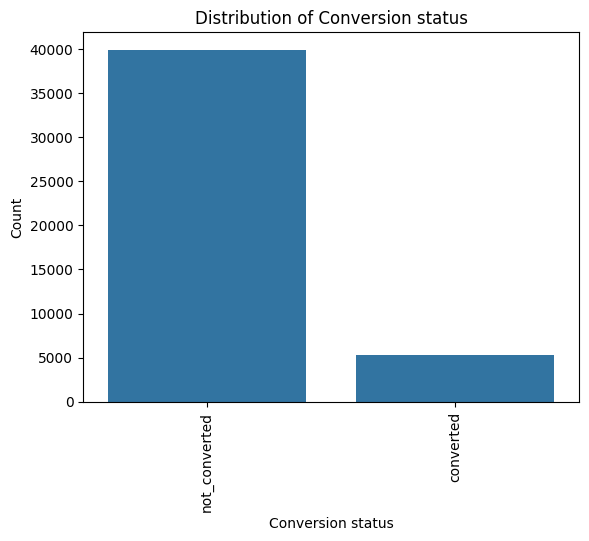

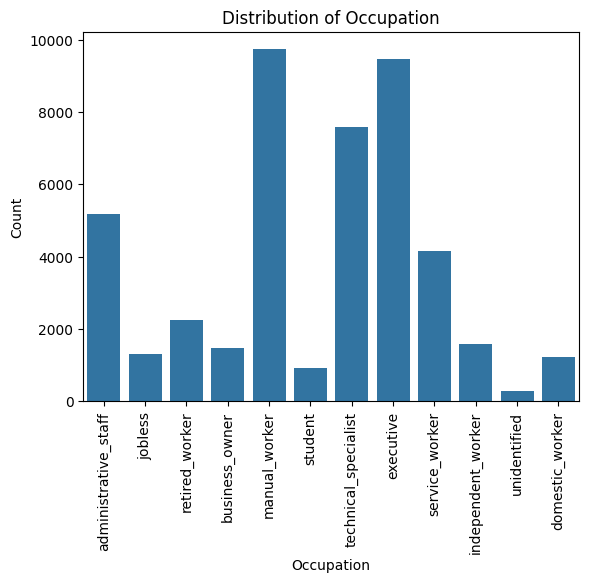

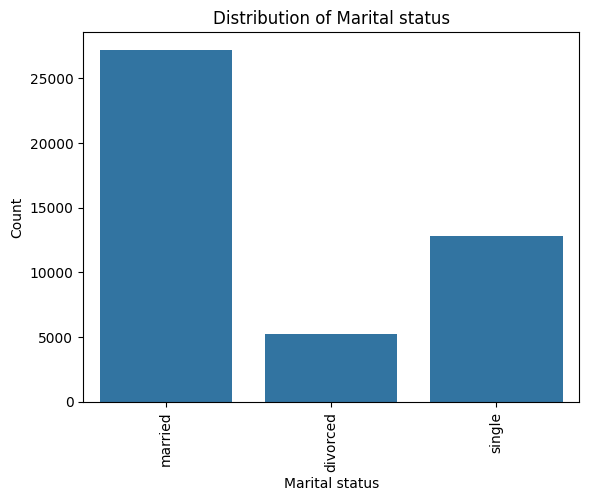

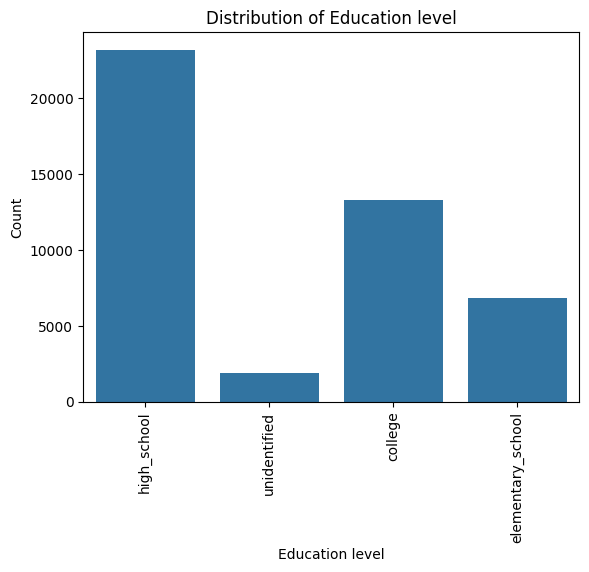

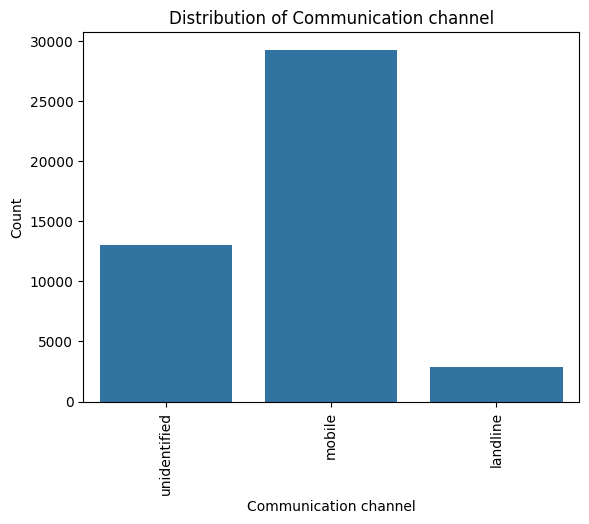

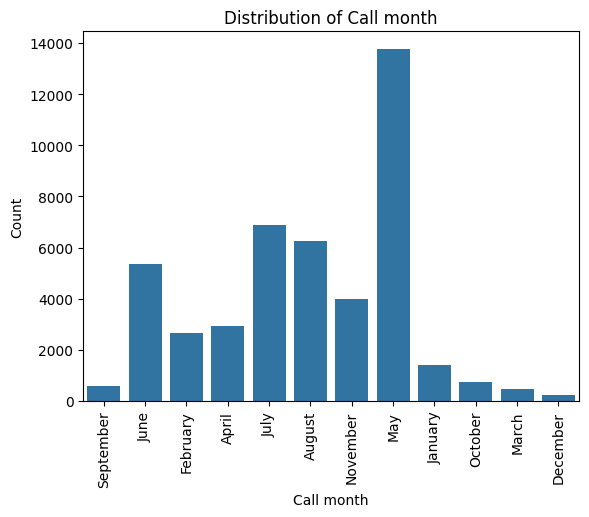

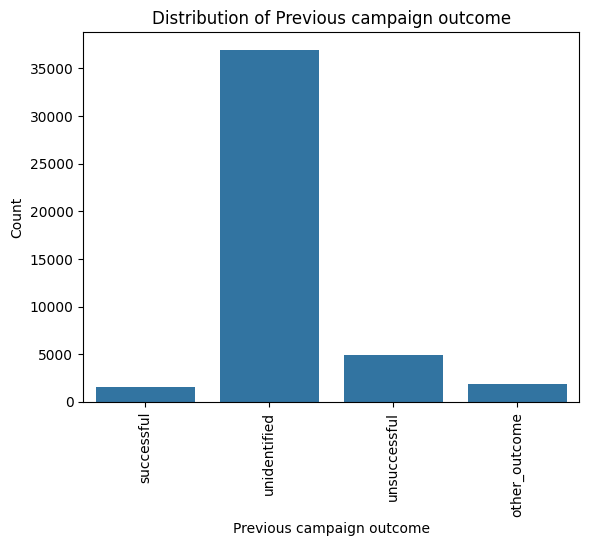

In [8]:
variables = ['conversion_status','occupation', 'marital_status', 'education_level', 'communication_channel', 'call_month', 'previous_campaign_outcome']

count_plots = {}

for var in variables:
    count_plots[var + '_ax'] = sns.countplot(x=var, data=df)
    plt.xticks(rotation=90)
    plt.xlabel(var.capitalize().replace('_', ' '))
    plt.ylabel('Count')
    plt.title('Distribution of ' + var.capitalize().replace('_', ' '))
    plt.show()

In [9]:
df.columns

Index(['occupation', 'age', 'education_level', 'marital_status',
       'communication_channel', 'call_month', 'call_day', 'call_duration',
       'call_frequency', 'previous_campaign_outcome', 'conversion_status'],
      dtype='object')

Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()

label_encoder = LabelEncoder()

cat_columns = ['occupation', 'marital_status', 'education_level', 'communication_channel', 'call_month', 'previous_campaign_outcome', 'conversion_status']

for col in cat_columns:
    data[col] = label_encoder.fit_transform(data[col])

data

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,0,28,2,1,2,11,9,1,1,1,1
1,0,58,3,1,2,6,5,307,2,2,1
2,5,40,2,0,1,3,4,113,1,2,1
3,7,63,2,1,1,0,7,72,5,2,1
4,1,43,0,1,0,5,29,184,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,0,50,2,0,1,8,6,114,1,3,1
45207,4,49,0,1,2,8,13,98,1,2,1
45208,3,30,0,1,1,6,12,175,2,0,1
45209,7,59,1,1,0,5,15,41,5,2,1


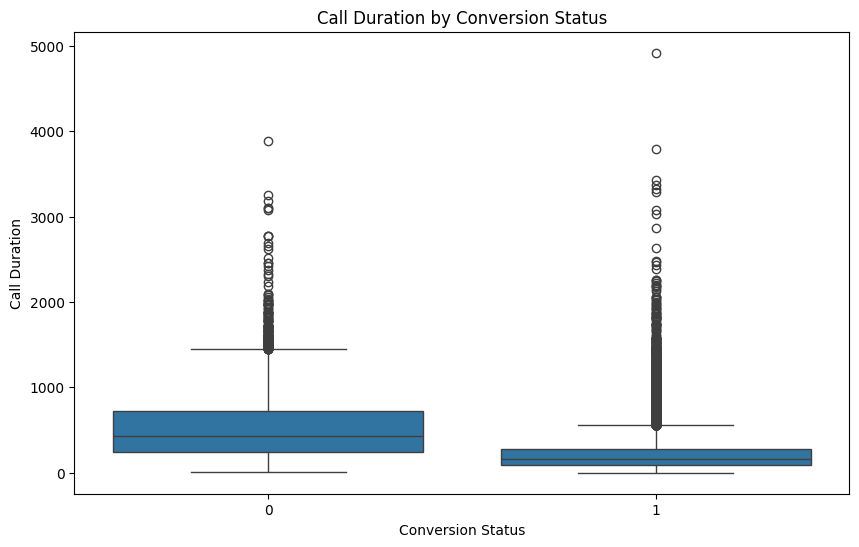

In [11]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='conversion_status', y='call_duration', data=data)
plt.title('Call Duration by Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Call Duration')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(data)

x_scaled_df = pd.DataFrame(x_scaled, columns=data.columns)
x_scaled_df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,-1.646772,-1.218295,0.744538,-0.275720,1.412183,1.821426,-0.817914,-0.998631,-0.569338,-1.800234,0.36401
1,-1.646772,1.606827,1.809931,-0.275720,1.412183,0.158585,-1.298553,0.189554,-0.246565,0.011623,0.36401
2,-0.097123,-0.088246,0.744538,-1.919818,-0.406867,-0.839120,-1.418713,-0.563740,-0.569338,0.011623,0.36401
3,0.522736,2.077680,0.744538,-0.275720,-0.406867,-1.836824,-1.058233,-0.722941,0.721753,0.011623,0.36401
4,-1.336842,0.194266,-1.386249,-0.275720,-2.225916,-0.173983,1.585283,-0.288050,0.398980,0.011623,0.36401


Different Models
Gaussian Naive Bayes

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['conversion_status'])
y = data['conversion_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Shape of X_train_res:", X_train_res.shape)
print("Shape of y_train_res:", y_train_res.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_res: (63792, 10)
Shape of y_train_res: (63792,)
Shape of X_test: (9041, 10)
Shape of y_test: (9041,)


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = GaussianNB()

model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7567746930649264
Precision: 0.8775705064388715
Recall: 0.7567746930649264
F1-score: 0.7968287012251684


Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8736865390996571
Precision: 0.8749819306232441
Recall: 0.8736865390996571
F1-score: 0.8743255683108476


Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_features=3)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9066474947461564
Precision: 0.8967362875580137
Recall: 0.9066474947461564
F1-score: 0.8998067300215706


Gradient Boosting Classifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Gradient Boosting Classifier:
Accuracy: 0.9080853887844265
Precision: 0.8961247337428865
Recall: 0.9080853887844265
F1-score: 0.8982951185070551


Confusion Matrix

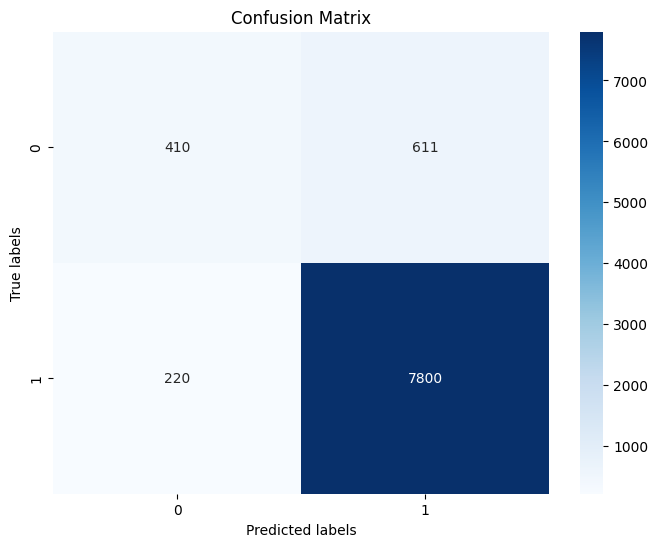

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()
